# Experimental data reconstruction (user data)

## **Import libraries**

Notice that it is important to change the real data source in parameters.py to your own data repository **before** running this notebook.

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4,5,6,7"         # set your preferred cuda visible device
os.chdir('..')
from parameters import *
from PtyINR.train import *
import matplotlib.pyplot as plt

## **Training**

You may also change training hyperparameters from parameters.py

Notice that though sometimes the loss seem to be converged without changing, it is in fact not. It is always good to run a few hundred steps more to reach better solution.

In [2]:
parameters["tag"]="experimental_data"  # final output file name
parameters["total_steps"]= 300         # total training steps
parameters["probe_known"]= False        # probe is provided or not
parameters["diffraction_scale"]=400        # the diffraction patterns will be divided by this value to ensure the loss is not too large for optimization as LR is usually below 1
parameters["batches"]=1300                # batch size for each loss backward
parameters["LR"]=6e-5                      # for object amplitude  
parameters["LR2"]=6e-5                     # for object phase 
parameters["LR3"]=5e-5                     # for probe amplitude
parameters["LR4"]=5e-5                     # for probe phase
parameters["regularized_loss_weight"]=1e-2
parameters["regularized_steps"]=50
parameters["show_every" ]=10
parameters["first_omega" ]=30                 # adjust it higher to get better details, please see paper for more details on this parameter
parameters["loss"]="SmoothL1"
parameters["beta_for_smoothl1"]=1e-5
parameters["model_type" ]="siren"

In [3]:
parameters["show_every"]=10

In [4]:
train_model(parameters)

Using stocastic gradient descent(SGD)!

Please use tensor board to see the intermediate images.
The tensor board files are stored in the folder:  result/tb
The images of latest reconstructions can be found at :  result/ 

[GPU 3] diffraction patterns shape (40401, 220, 220)
[GPU 2] diffraction patterns shape (40401, 220, 220)
[GPU 0] diffraction patterns shape (40401, 220, 220)
[DDP] Requested global batch=1300 -> per-rank batch=325 (effective global=1300)
[GPU 1] diffraction patterns shape (40401, 220, 220)
using SmoothL1 loss for training!
[GPU 0] Step 0, global accumulated loss: 80.663251
[GPU 0] Step 10, global accumulated loss: 33.904085
[GPU 0] Step 20, global accumulated loss: 33.010641
[GPU 0] Step 30, global accumulated loss: 32.061158
[GPU 0] Step 40, global accumulated loss: 31.768030
[GPU 0] Step 50, global accumulated loss: 31.427146
[GPU 0] Step 60, global accumulated loss: 31.337189
[GPU 0] Step 70, global accumulated loss: 38.041908
[GPU 0] Step 80, global accumulated l

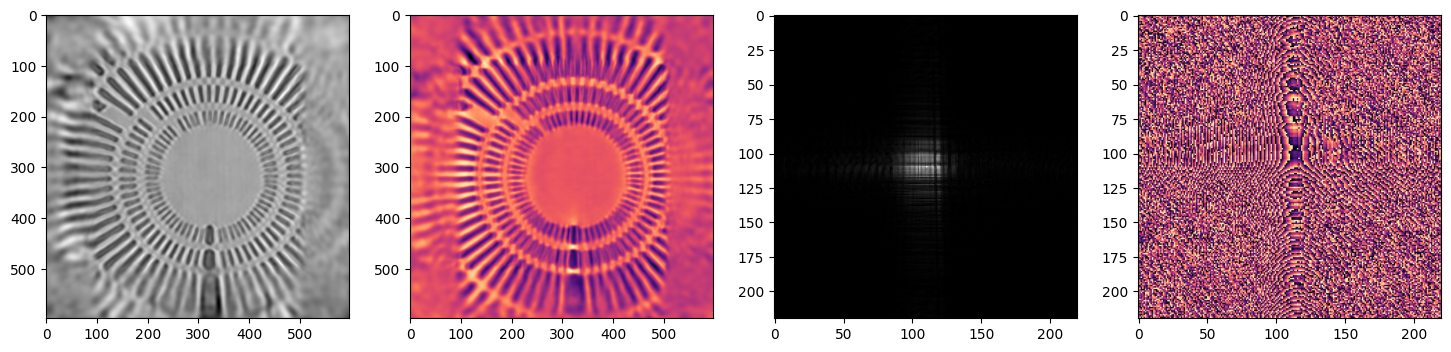

In [5]:
recon_obj = np.load("result/experimental_data_obj.npy")
recon_probe = np.load("result/experimental_data_probe.npy")
fig, axes = plt.subplots(1,4, figsize=(18,6))
axes[0].imshow(np.rot90(np.abs(recon_obj),k=4),cmap="grey")
axes[1].imshow(np.rot90(np.angle(recon_obj),k=4),cmap="magma")
axes[2].imshow(np.abs(recon_probe),cmap="grey")
axes[3].imshow(np.angle(recon_probe),cmap="magma")
plt.show()